# Importing

In [1]:
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')


# Working on Data

In [2]:
image_directory='datasets/'

no_tumor_images=os.listdir(image_directory+ 'no/')
yes_tumor_images=os.listdir(image_directory+ 'yes/')
dataset=[]
label=[]

INPUT_SIZE=64


# resizing and changing it's color in RGB form for the non tumor images
for i , image_name in enumerate(no_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'no/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)

# resizing and changing it's color in RGB form for the tumor images

for i , image_name in enumerate(yes_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'yes/'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

# Training Data

In [3]:
image_directory='datasets/'

no_tumor_images=os.listdir(image_directory+ 'no/')
yes_tumor_images=os.listdir(image_directory+ 'yes/')
dataset=[]
label=[]

INPUT_SIZE=64


# resizing and changing it's color in RGB form for the non tumor images
for i , image_name in enumerate(no_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'no/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)

# resizing and changing it's color in RGB form for the tumor images

for i , image_name in enumerate(yes_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'yes/'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

dataset=np.array(dataset)
label=np.array(label)


x_train, x_test, y_train, y_test=train_test_split(dataset, label, test_size=0.2, random_state=0)

# Reshape = (n, image_width, image_height, n_channel)


x_train=normalize(x_train, axis=1)
x_test=normalize(x_test, axis=1)

y_train=to_categorical(y_train , num_classes=2)
y_test=to_categorical(y_test , num_classes=2)






# Binary CrossEntropy= 1, sigmoid
# Categorical Cross Entryopy= 2 , softmax



In [4]:
# from sklearn.datasets import make_circles
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import f1_score
# from sklearn.metrics import cohen_kappa_score
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import confusion_matrix

# x_test_prediction = model.predict(x_test)
# train_data_accuracy = accuracy_score(y_test,x_test_prediction)
# print(train_data_accuracy)


# predict crisp classes for test set
# yhat_classes = model.predict(x_test, verbose=0)
# yhat_classes = (model.predict(x_test) > 0.5).astype("int32")
# yhat_classes = np.argmax(model.predict(x_test), axis=0)
# # reduce to 1d array
# yhat_classes = yhat_classes[:, 0]

# accuracy = accuracy_score(y_test, yhat_classes)
# print('Accuracy: %f' % accuracy)
# # precision tp / (tp + fp)
# precision = precision_score(y_test, yhat_classes)
# print('Precision: %f' % precision)
# # recall: tp / (tp + fn)
# recall = recall_score(y_test, yhat_classes)
# print('Recall: %f' % recall)
# # f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(testy, yhat_classes)
# print('F1 score: %f' % f1)
 
# # kappa
# kappa = cohen_kappa_score(y_test, yhat_classes)
# print('Cohens kappa: %f' % kappa)
# # ROC AUC
# auc = roc_auc_score(y_test, yhat_probs)
# print('ROC AUC: %f' % auc)
# # confusion matrix
# matrix = confusion_matrix(y_test, yhat_classes)
# print(matrix)

# Model Building


In [5]:
# Model Building

model=Sequential()

model.add(Conv2D(32, (3,3), input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                    

# Compiling model and training

In [7]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint, EarlyStopping
# model check point
mc = ModelCheckpoint(filepath="bestmodel.h5",monitor='val_accuracy',
                     verbose=1,save_best_only=True,
                     save_weights_only=False,mode= 'max')
cb = [mc]



history = model.fit(x_train, y_train, 
batch_size=16, 
verbose=1, epochs=20, 
validation_data=(x_test, y_test),
shuffle=False,callbacks=cb)



# model.save('Bestmodel.hdf5')


Epoch 1/20
149/150 [============================>.] - ETA: 0s - loss: 0.5579 - accuracy: 0.7253
Epoch 1: val_accuracy improved from -inf to 0.77333, saving model to bestmodel.h5
150/150 [==============================] - 7s 41ms/step - loss: 0.5557 - accuracy: 0.7271 - val_loss: 0.4654 - val_accuracy: 0.7733
Epoch 2/20
149/150 [============================>.] - ETA: 0s - loss: 0.3955 - accuracy: 0.8377
Epoch 2: val_accuracy improved from 0.77333 to 0.84000, saving model to bestmodel.h5
150/150 [==============================] - 6s 39ms/step - loss: 0.3937 - accuracy: 0.8383 - val_loss: 0.3507 - val_accuracy: 0.8400
Epoch 3/20
149/150 [============================>.] - ETA: 0s - loss: 0.2913 - accuracy: 0.8842
Epoch 3: val_accuracy improved from 0.84000 to 0.89667, saving model to bestmodel.h5
150/150 [==============================] - 6s 38ms/step - loss: 0.2907 - accuracy: 0.8846 - val_loss: 0.2472 - val_accuracy: 0.8967
Epoch 4/20
149/150 [============================>.] - ETA: 0s - 

# Analysing model loss and accuracy

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

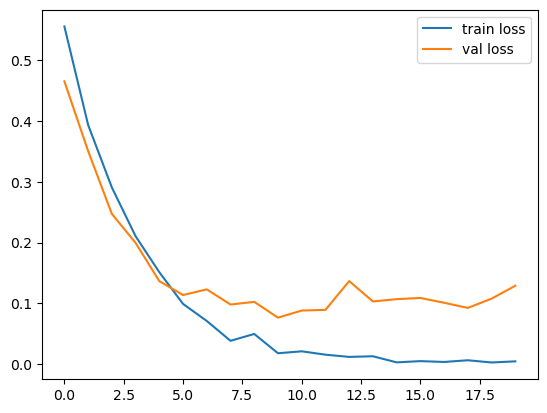

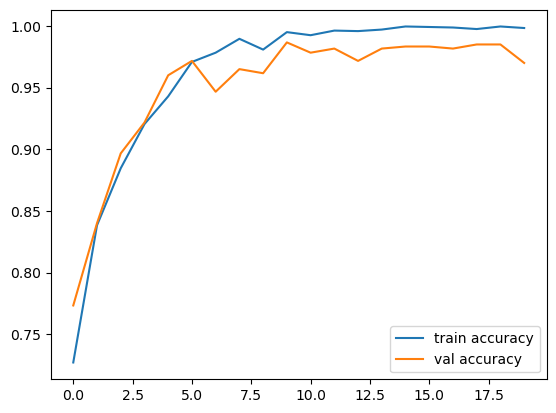

<Figure size 640x480 with 0 Axes>

In [14]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# epochs = range(len(acc))

# fig = plt.figure(figsize=(14,7))
# plt.plot(epochs,acc,'r',label = "Training Accuracy",labelsize = '30')
# plt.plot(epochs,val_acc,'b',label = "Validation Accuracy",labelsize = '30')
# plt.legend(loc = 'upper left')
# # plt.savefig('acc_val_acc.png')
# plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_inception')

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('LossVal_inception')

In [15]:
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(len(loss))

# fig = plt.figure(figsize=(14,7))
# plt.plot(epochs,loss,'r',label = "Training loss",labelsize=30)
# plt.plot(epochs,val_loss,'b',label = "Validation loss",labelsize =30)
# plt.legend(loc = 'upper left')
# # plt.savefig('loss_val_loss.png')
# plt.show()

# Model Accuracy


In [18]:
print(f"The training accuracy of this model is {acc[-1] *100} %")
print(f"The Validation accuracy of this model is {val_acc[-1] *100} %")

The training accuracy of this model is 99.83333349227905 %
The Validation accuracy of this model is 97.00000286102295 %


# Testing

1/1 [==============================] - 0s 99ms/step
[[1. 0.]]


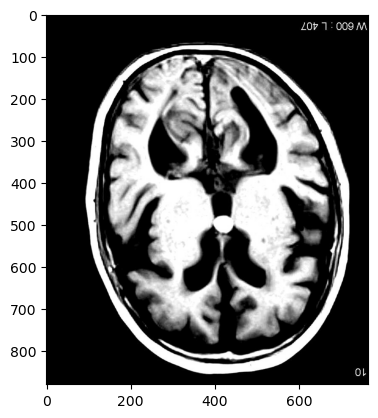

In [19]:
import cv2
from keras.models import load_model
from PIL import Image
import numpy as np

model=load_model('bestmodel.h5')

image=cv2.imread('D:\\Deep Learning Project\\Brain Tumor Image Classification\\datasets\\yes\\y10.jpg')

img=Image.fromarray(image)

img=img.resize((64,64))

img=np.array(img)

input_img=np.expand_dims(img, axis=0)

result=model.predict(input_img)

print(result)
plt.imshow(image)


In [8]:
model_accuracy = [17,6,3]
model_name = ['0-19 year','20-24 year','35-74 year']

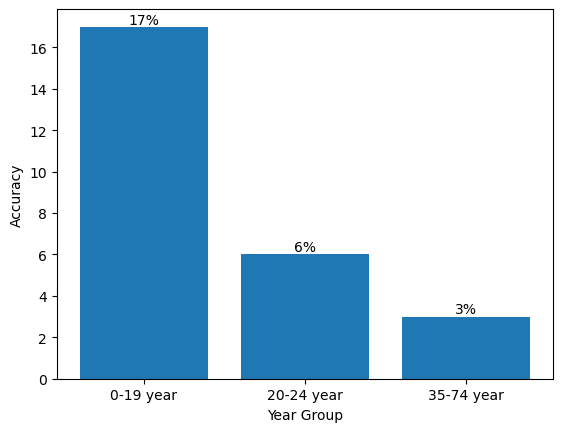

In [13]:
plt.bar(model_name,model_accuracy)
plt.xlabel('Year Group')
plt.ylabel('')
for i in range(len(model_accuracy)):
    plt.text(i,model_accuracy[i],str(model_accuracy[i])+'%',ha ='center',va = 'bottom')
plt.show()
# plt.savefig('MLmodelsaccuracy_bar_graph')